<a href="https://colab.research.google.com/github/KimJunGu9/5.ML-DL/blob/main/6_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 파이토치(Pytorch)

* Pythorch는 tenserflow와 함께 머신러닝, 딥러닝에서 가장 널리 사용되는 framework
* 초기에는 Torch 라는 이름으로 Lua언어 기반으로 만들어졌으나, 이후 Python기반으로 변경한 것이 Pytorch
* Newyork대학교와 Facebook이 공동으로 개발하였고, 현재 가장 대중적이고 널리 사용되는 framework


* 프레임워크 : 이미 틀은 만들어져 있고 이미 안에 채워서 개발하는 것
* 라이브러리 : 틀이 안만들어져 있고, 내가 만들고자하는 프로젝트에 필요한것을 쏙쏙 가져오는 것

In [ ]:
import torch
print(torch.__version__)

1.12.1+cu113


### 1-1. Tensor
* 텐서는 배열이나 행렬과 매우 유사한 특수 자료구조
* 파이토치는 텐서를 사용하여 모델의 입력과 출력, 모델의 매개변수들을 부호화함


In [ ]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [ ]:
import numpy as np

In [ ]:
np_array = np.array(data)
x_np_1 = torch.tensor(np_array)
print(x_np_1)

tensor([[1, 2],
        [3, 4]])


In [ ]:
x_np_1[0, 0] = 100
print(x_np_1)  # 새로운 텐서
print(np_array)  # 기존 ndarray

tensor([[100,   2],
        [  3,   4]])
[[1 2]
 [3 4]]


In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
x_np_2 = torch.as_tensor(np_array)  # torch.as_tensor() : 동일한 메모리 주소를 가리키는 뷰를 만듦 (다른 데이터 타입도 텐서로 바꿔줌)
print(x_np_2)

tensor([[1, 2],
        [3, 4]])


In [ ]:
x_np_2[0, 0] = 200
print(x_np_2)
print(np_array)

tensor([[200,   2],
        [  3,   4]])
[[200   2]
 [  3   4]]


In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
x_np_3 = torch.from_numpy(np_array)  # torch.from_numpy() : 동일한 메모리 주소를 가리키는 뷰를 만듦 (넘파이로만)
print(x_np_3)

tensor([[200,   2],
        [  3,   4]])


In [ ]:
x_np_3[0 , 0] = 300
print(x_np_3)
print(np_array)

tensor([[300,   2],
        [  3,   4]])
[[300   2]
 [  3   4]]


In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [ ]:
np_again = x_np_1.numpy()
print(np_again, type(np_again))

[[100   2]
 [  3   4]] <class 'numpy.ndarray'>


In [ ]:
a = torch.ones(2, 3)
print(a)

b = torch.zeros(2, 3)
print(b)

c = torch.full((2, 3), 2) # 2행 3열을 2를 넣어서 만들어라
print(c)

d = torch.empty(2, 3) # 0~1 사이의 데이터가 랜덤으로 들어감
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[4.5364e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 1.0000e+00]])


In [ ]:
e = torch.eye(3)  # 3행 3열짜리에서 대각선으로 1이 들어감
print(e)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [ ]:
f  = torch.arange(10) # 0이상 10미만
print(f)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
g = torch.rand(2, 2)
print(g)
h = torch.randn(2, 2) # randn : 마이너스도 들어가는 랜덤값
print(h)

tensor([[0.6964, 0.0827],
        [0.3724, 0.7141]])
tensor([[-1.4017, -1.0093],
        [ 0.7640,  0.5430]])


### 1-2. Tensor 속성

In [ ]:
tensor = torch.rand(3, 4)
print(f'shape : {tensor.shape}')
print(f'type : {tensor.dtype}')
print(f'device : {tensor.device}')


shape : torch.Size([3, 4])
type : torch.float32
device : cpu


In [ ]:
# 속성 변경
# 코랩에서 device를 변경하는 방법 : 런타임 -> 런타임 유형변경 -> 하드웨어 가속기를 gpu로 변경
tensor = tensor.reshape(4, 3)
tensor = tensor.int()
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

print(f'shape : {tensor.shape}')
print(f'type : {tensor.dtype}')
print(f'device : {tensor.device}')


shape : torch.Size([4, 3])
type : torch.int32
device : cpu


### 1-3. Indexing과 slicing

In [ ]:
a = torch.arange(1, 13).reshape(3, 4)
print(a)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


In [ ]:
print(a[1]) # 1행 전부
print(a[0, -1]) # 0행 뒤에서 -1열
print(a[1: -1]) 
print(a[:2, 2:]) # 0,1 행, 2번째부터 열 끝까지

tensor([5, 6, 7, 8])
tensor(4)
tensor([[5, 6, 7, 8]])
tensor([[3, 4],
        [7, 8]])


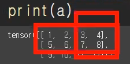

### 1-4. Transpose

In [ ]:
a = torch.arange(16).reshape(2, 2, 4) # 0~15 까지 , 2매트릭스 2행 4열
print(a, a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])


In [ ]:
b = a.transpose(1, 2) 
print(b, b.shape)

tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]]) torch.Size([2, 4, 2])


In [ ]:
c = a.permute((2, 0 ,1))
print(c, c.shape)

tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]]) torch.Size([4, 2, 2])


### 1-5. Tensor 연산

In [ ]:
x = torch.tensor([[1, 2], [3, 4]], dtype = torch.float32)
y = torch.tensor([[5, 6], [7, 8]], dtype = torch.float32)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [ ]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)
print('*' * 30)
print(torch.add(x, y))
print(torch.subtract(x, y))
print(torch.multiply(x, y))
print(torch.divide(x, y))
print(torch.matmul(x, y))

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])
******************************
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


In [ ]:
# in-place 연산
print(x.add(y))
print(x)

print(x.add_(y)) # x에 결과를 다시 저장  # add뒤에 _ 붙이면 += 랑 같다 (파이토치 한정)
print(x)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])


In [ ]:
z = torch.arange(1, 11).reshape(2, 5)
print(z)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


In [ ]:
sum1 = torch.sum(z, axis = 0)
print(sum1, sum1.shape)

sum2 = torch.sum(z, axis= 1)
print(sum2, sum2.shape)

sum3 = torch.sum(z, axis = -1)
print(sum3, sum3.shape)

tensor([ 7,  9, 11, 13, 15]) torch.Size([5])
tensor([15, 40]) torch.Size([2])
tensor([15, 40]) torch.Size([2])


In [ ]:
a = torch.arange(24).reshape(4, 6)
b = a.clone().detach()  # a = torch.arange(24).reshape(4, 6)를 clone에 넣고 detach()해서 b에 넣는다
print(a, a.shape)
print(b, b.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])
